Medical Expenses Prediction using Multiple Linear Regression Model

In [1]:
#Importing all Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
import statsmodels.api as sm
import sklearn.metrics as sk

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading Dataset 
data = pd.DataFrame(pd.read_csv("/content/Insurance Premium Prediction.csv"))

In [3]:
#First 5 values
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
#Last 5 values 
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
#Get all the keys of the dataset Dictionary 
data.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
#Display all the columns with corresponding count of non null observation and along with their data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


from the above infomation we can say that total 7 Columns are there where we have total. Here in each Column there is no null values and also got 3 different data types ( int , objective , float).

In [7]:
# total numbers of Row and Columns 
data.shape

(1338, 7)

So here we have total 1338 Rows and 7 Columns in the given dataset 

In [8]:
#Statistical Measurement of dataset
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


From the above dataset we can see that Age,BMI,Children,Expenses are only Numeric Values and also get corresponding their statistical measurement. Here from the above information we can conclude that Age varible is symmetrically distributed as Mean = Median. BMI is also symmetrically distributed. But variable Expenses is positively skewed as Mean > Median.

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

So, here is **no null values with respect to each Column** of the dataset. Hence data cleaning is not required.

In [10]:
#Summary of the character Variable 
data.describe(include = np.object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Here variable Sex has 2 levels , variable Smoker has 2 levels , variable Region has 4 levels. 

In [11]:
# Find Categories of each of the Character variable 
data["sex"].unique()

array(['female', 'male'], dtype=object)

Sex Explanatory variable has two categories as Male and Female.

In [12]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

Smoker Explanatory variable has two categories as Yes and No.

In [13]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Region Explanatory variable has four categories namely viz South-West ,South-East , North-West , North-East. 

(<Figure size 540x900 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f4bb1a2d0d0>)

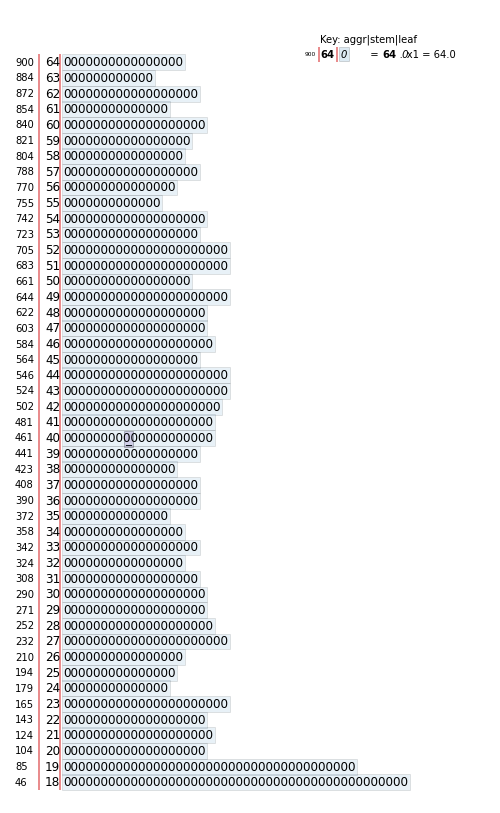

In [14]:
# Stem and Leaf Plotting
!pip install stemgraphic
import stemgraphic
stemgraphic.stem_graphic(data["age"],scale=1)

(<Figure size 540x738 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f4bb184ba10>)

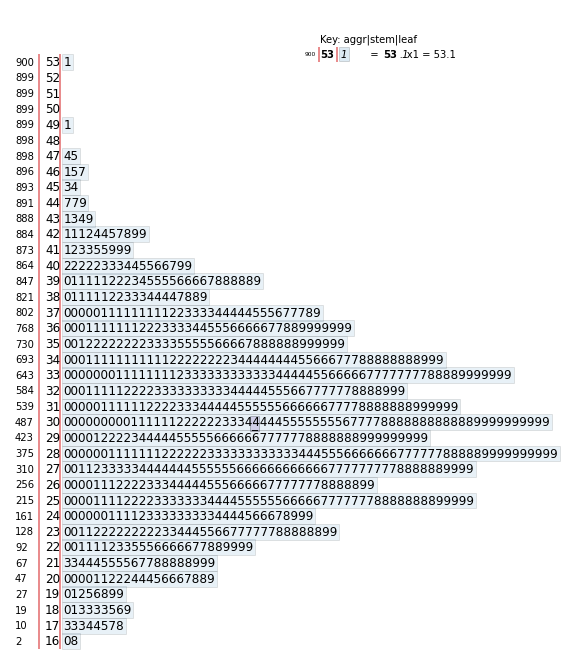

In [15]:

stemgraphic.stem_graphic(data["bmi"],scale=1)

(<Figure size 540x180 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f4bb11f8190>)

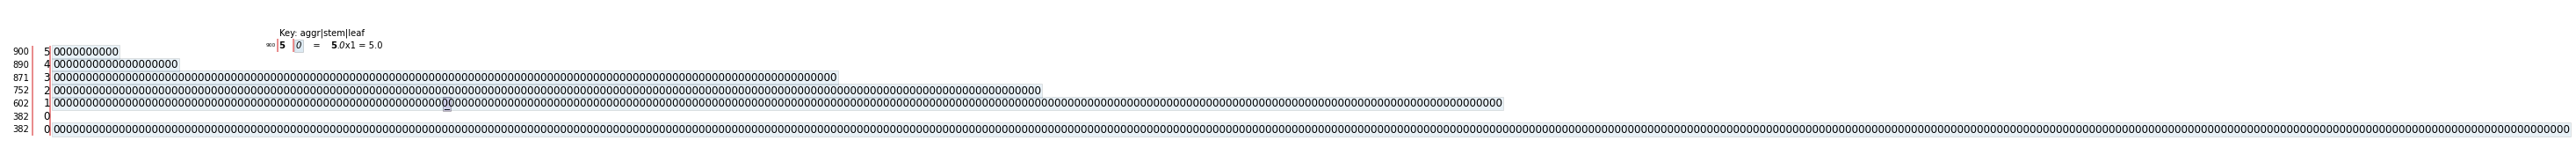

In [16]:
stemgraphic.stem_graphic(data["children"],scale=1)

(<Figure size 540x288 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f4bb09d5ad0>)

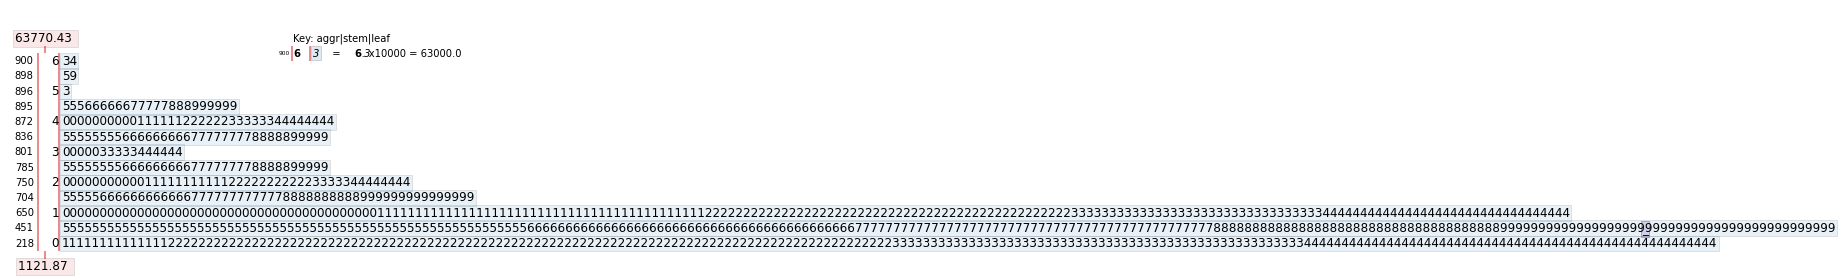

In [17]:
stemgraphic.stem_graphic(data["expenses"],scale=0)

Now stem and Leaf is use to get distribution of the Quantitative data in a graphical format. Now here we split data values and in Stem part we keep first digit or digits and in Leaf part we keep last digit or digits. Which I have done above by using stem_graphic() function. But here we can see that BMI variable is symmetrically distributed. But Children and Expenses doesn't provide neat result as it is very clumsy and splitting is not properly visible. Here Histogram provide a edge over Stem and Leaf Plots.
 Now we will draw Histogram.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



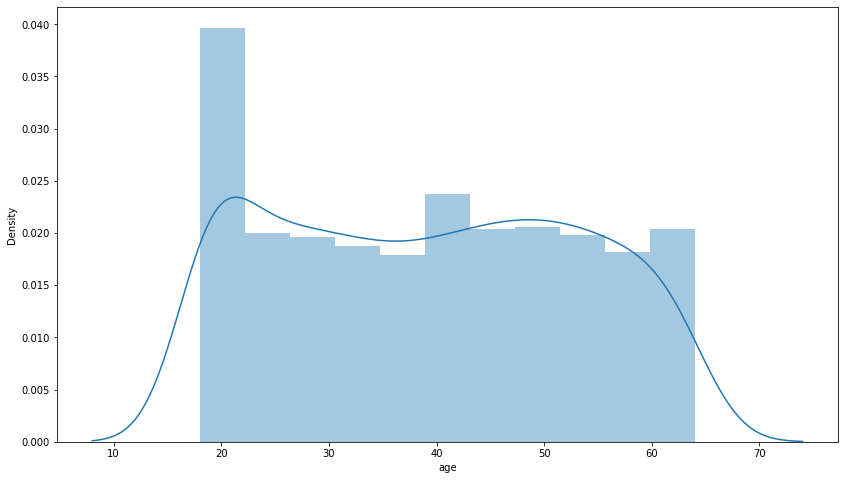

In [18]:
plt.figure(figsize=(14,8))
sns.distplot(data['age'].dropna())

Here we plot Histogram which is used for Univariate Data analysis. Now we can conclude based on the graphical representation that

Age : Uniformly Distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



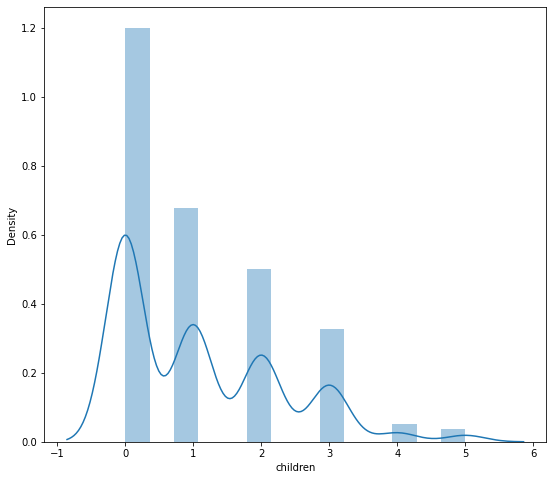

In [19]:
plt.figure(figsize=(9,8))
sns.distplot(data['children'].dropna())

Now we can conclude based on the graphical representation that

People having no children has maximum frequency in comparison of the frequency of having 1 children, 2 children, 3 children. Frequency of having 4 children, 5 children is very negligible.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



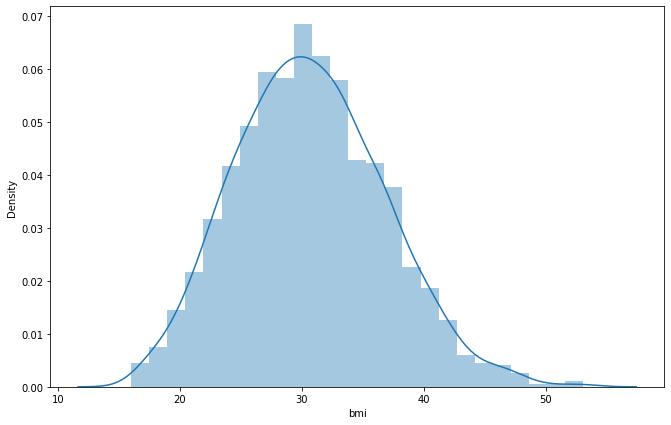

In [20]:
plt.figure(figsize=(11,7))
sns.distplot(data['bmi'].dropna())

Now we can conclude based on the graphical representation that

BMI: Normally Distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



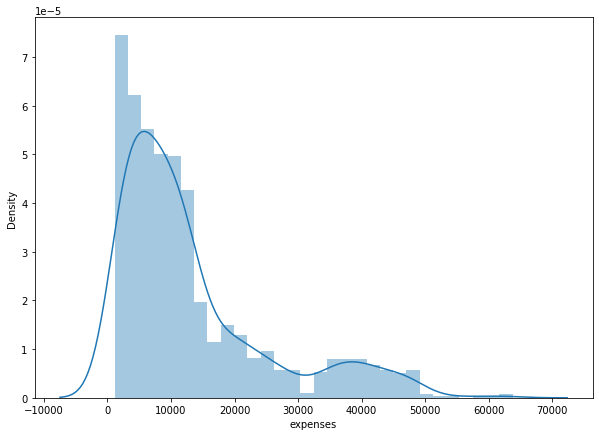

In [21]:
plt.figure(figsize=(10,7))
sns.distplot(data['expenses'].fillna(100))

Here we plot Histogram which is used for Univariate Data analysis. Now we can conclude based on the graphical representation that

Expenses : Positively Skewed and Leptokurtic Distribution

Text(0.5, 1.0, 'Normal Q-Q plot of log(age)')

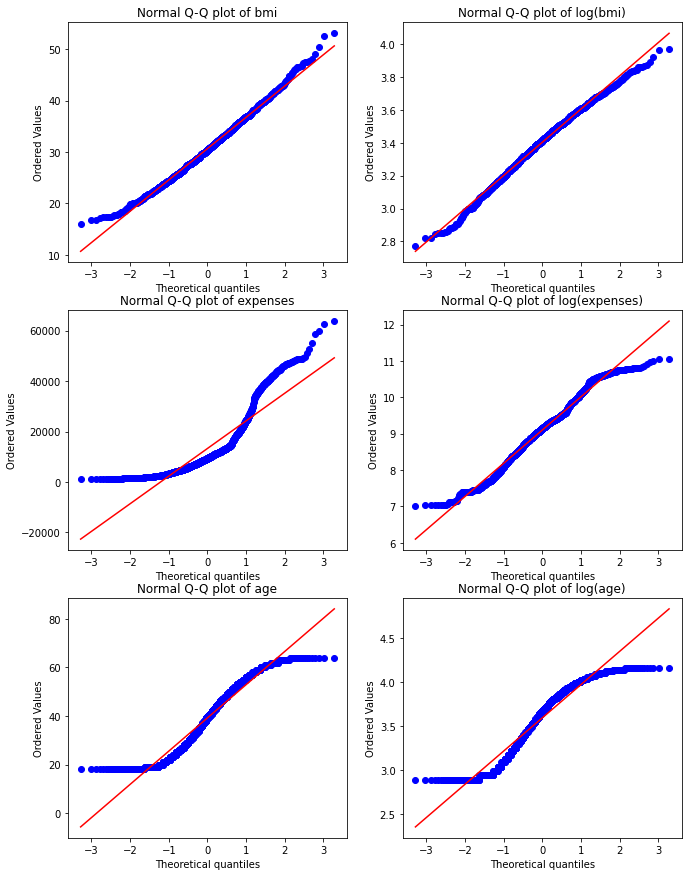

In [22]:
# Checking for Normal / Lognormal Distribution 
plt.figure(figsize=(11,15)) 
plt.subplot(3,2,1) 
stats.probplot(data['bmi'], dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of bmi') 
plt.subplot(3,2,2) 
stats.probplot(np.log(data['bmi']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(bmi)') 
plt.subplot(3,2,3) 
stats.probplot(data['expenses'], dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of expenses') 
plt.subplot(3,2,4) 
stats.probplot(np.log(data['expenses']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(expenses)')
plt.subplot(3,2,5) 
stats.probplot(data['age'], dist="norm", plot=plt, fit = True)
plt.title('Normal Q-Q plot of age') 
plt.subplot(3,2,6) 
stats.probplot(np.log(data['age']), dist="norm", plot=plt, fit = True) 
plt.title('Normal Q-Q plot of log(age)') 

From the above graphical representation we can conclude that the scatter plot of theoretical quantiles vs sample quantiles fit the reference line better for normal distribution in BMI. So it is Normally Distributed and the scatter plot of theoretical quantiles vs sample quantiles fit the reference line better for Log normal distribution in Expenses. So Expenses is Log Normally Distributed.










In [23]:
import plotly.express as px
plt.figure(figsize=(4,4))
fig = px.histogram(data, x="sex",nbins=10,color='sex')
fig.update_layout(title_text='Gender Distribution',xaxis_title_text='Gender of the Policy Holder' ,yaxis_title_text='Frequency')
fig.show()

<Figure size 288x288 with 0 Axes>

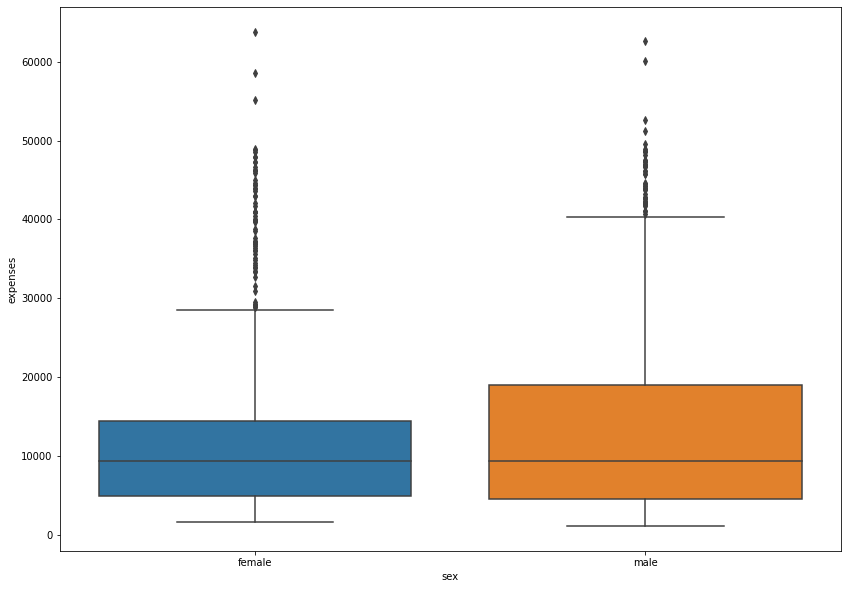

In [24]:
plt.figure(figsize = (14,10))
sns.boxplot(x = data['sex'],y = data['expenses']) 
plt.show()

For Male peole expenses is relatively high as Male Categorical variable is Positively Skewed . So, majority of the Male people lies beyond median.

For Female people expenses is symmetrically distributed.

In [25]:
fig = px.histogram(data, x="smoker",nbins=10,color='smoker')
fig.update_layout(title_text='Smokers Distribution',xaxis_title_text='Smoker of the Policy Holder' ,yaxis_title_text='Frequency')
fig.show()

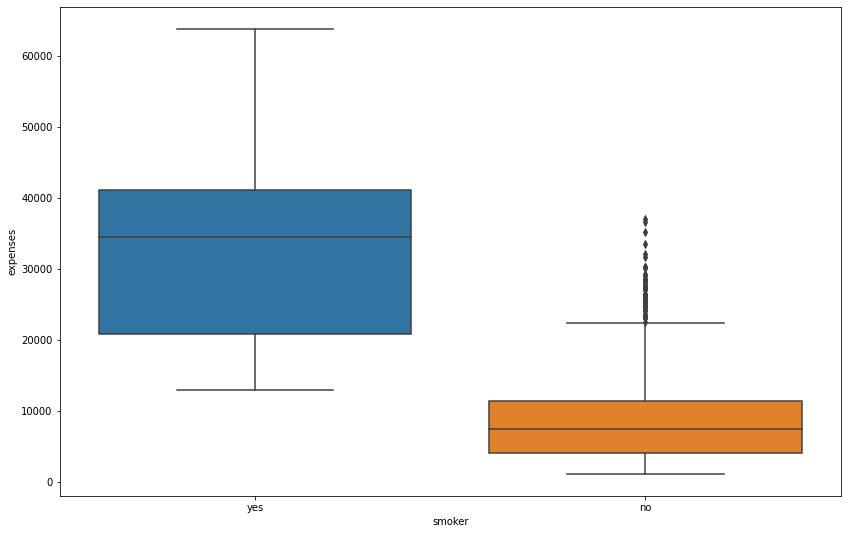

In [26]:
plt.figure(figsize = (14,9))
sns.boxplot(x = data['smoker'],y = data['expenses']) 
plt.show()

Here Smokers are Negatively Skewed and So majority of people lies left side of the Median value, those people expenses is in between 20000 to 35000. 

Non Smokers are Symmetrically Distributed and people who are smoker their expenses in between 5000 to 14000.

In [27]:
fig = px.histogram(data, x="region",nbins=50,color_discrete_sequence=['red'])
fig.update_layout(title_text='No. of Region Distribution', xaxis_title_text='No. of Region of the Policy Holder' ,yaxis_title_text='Frequency')
fig.show()

Majority people are from South-East Region

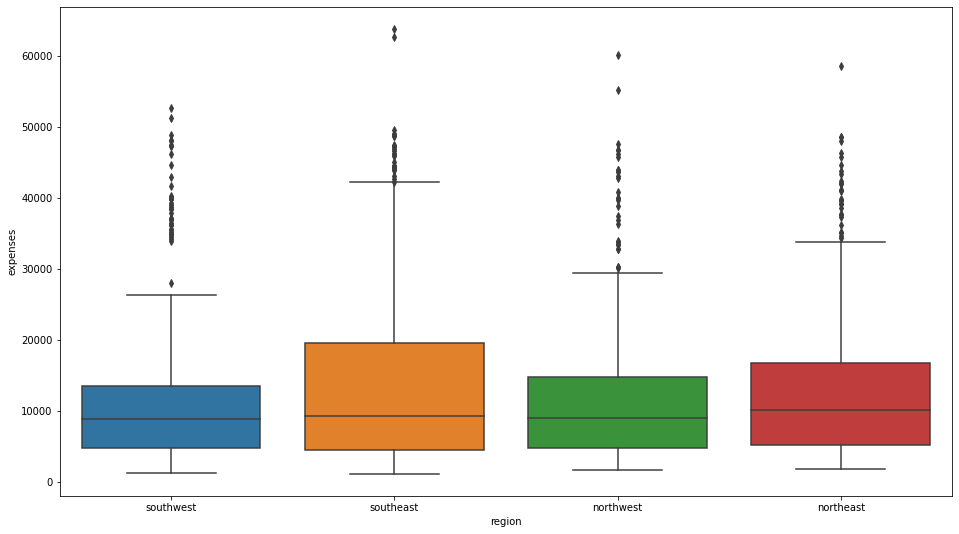

In [28]:
plt.figure(figsize = (16,9))
sns.boxplot(x = data['region'],y = data['expenses']) 
plt.show()

South-East Region is positively Skewed and also signify that no. of people are greater than median value have expenses 12000 to 22000. 

South-West region , North-West region , North-East region is symmetrically distributed.

Data Encoding for Categorical Variable


In [29]:
data['sex']=[0 if data['sex'][i]== 'male' else 1 for i in data.index] # 0 if Sex is "Male" and 1 if Sex is "Female"

In [30]:
data['smoker']=[0 if data['smoker'][i]== 'yes' else 1 for i in data.index]  # 0 if Person is "Smoker" and 1 if Person is "Non Smoker" 

In [31]:
for i in data.columns:
    print(len(data[i].unique()))

47
2
275
6
2
4
1337


In [32]:
data.region.value_counts().sort_values(ascending=False)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [33]:
new_region=data.region.value_counts().sort_values(ascending=False).head(10).index
new_region=list(new_region)

In [34]:
new_region

['southeast', 'southwest', 'northwest', 'northeast']

In [35]:
for categories in new_region:
    data[categories]=np.where(data['region']==categories,1,0)

In [36]:
data[new_region].head()

,southeast,southwest,northwest,northeast
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [37]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,southeast,southwest,northwest,northeast
0,19,1,27.9,0,0,southwest,16884.92,0,1,0,0
1,18,0,33.8,1,1,southeast,1725.55,1,0,0,0
2,28,0,33.0,3,1,southeast,4449.46,1,0,0,0
3,33,0,22.7,0,1,northwest,21984.47,0,0,1,0
4,32,0,28.9,0,1,northwest,3866.86,0,0,1,0


In [38]:
data1= data.drop("region",axis=1)

In [39]:
data1.head()

,age,sex,bmi,children,smoker,expenses,southeast,southwest,northwest,northeast
0,19,1,27.9,0,0,16884.92,0,1,0,0
1,18,0,33.8,1,1,1725.55,1,0,0,0
2,28,0,33.0,3,1,4449.46,1,0,0,0
3,33,0,22.7,0,1,21984.47,0,0,1,0
4,32,0,28.9,0,1,3866.86,0,0,1,0


In [40]:
data1.corr()

,age,sex,bmi,children,smoker,expenses,southeast,southwest,northwest,northeast
age,1.000000,0.020856,0.109341,0.042469,0.025019,0.299008,-0.011642,0.010016,-0.000407,0.002475
sex,0.020856,1.000000,-0.046380,-0.017163,0.076185,-0.057292,-0.017117,0.004184,0.011156,0.002425
bmi,0.109341,-0.046380,1.000000,0.012645,-0.003968,0.198576,0.270144,-0.006398,-0.135992,-0.138091
children,0.042469,-0.017163,0.012645,1.000000,-0.007673,0.067998,-0.023066,0.021914,0.024806,-0.022808
smoker,0.025019,0.076185,-0.003968,-0.007673,1.000000,-0.787251,-0.068498,0.036945,0.036945,-0.002811
expenses,0.299008,-0.057292,0.198576,0.067998,-0.787251,1.000000,0.073982,-0.043210,-0.039905,0.006349
southeast,-0.011642,-0.017117,0.270144,-0.023066,-0.068498,0.073982,1.000000,-0.346265,-0.346265,-0.345561
southwest,0.010016,0.004184,-0.006398,0.021914,0.036945,-0.043210,-0.346265,1.000000,-0.320829,-0.320177
northwest,-0.000407,0.011156,-0.135992,0.024806,0.036945,-0.039905,-0.346265,-0.320829,1.000000,-0.320177
northeast,0.002475,0.002425,-0.138091,-0.022808,-0.002811,0.006349,-0.345561,-0.320177,-0.320177,1.000000


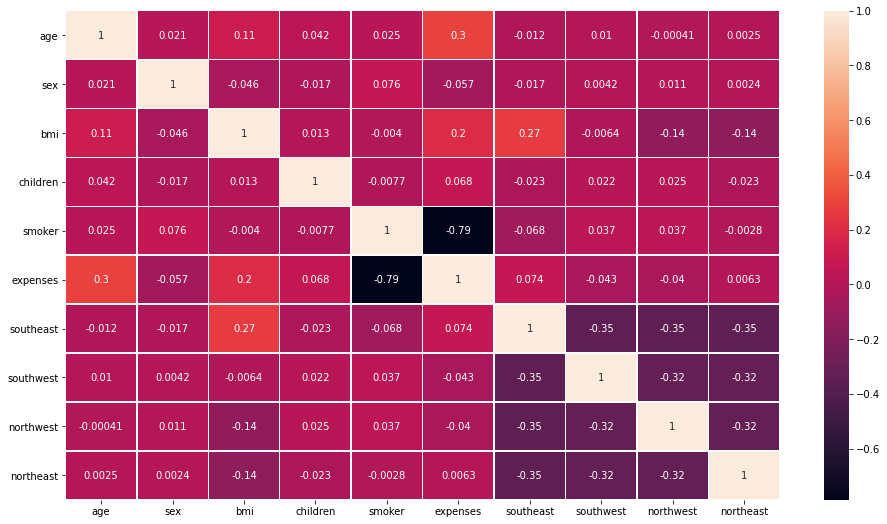

In [41]:
# Heat Map for checking Correlation
plt.figure(figsize = (16,9))
sns.heatmap(data1.corr(), annot = True,linewidth=0.5)
plt.show()

From the above representation we can say that 

in between Age and Sex we have very weak Correlation, age and BMI have weak coreelation, age and smoker also have weak correlation. Age and Expenses has a moderate correlation, Age and South-West region also Age and North-west region have a negative Correlation.

Sex and Expenses have a negative Correlation. 

Correlation between Children and Expenses is very weak.

Correlation between Smoker and Expenses is strongly Negatively Correlated.

Correlation between South-East region and Expenses is weak.

Correlation between South-West region and Expenses is weakly negative.

Correlation between North-West region and Expenses is weakly negative.

Correlation between North-East region and Expenses is zero.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



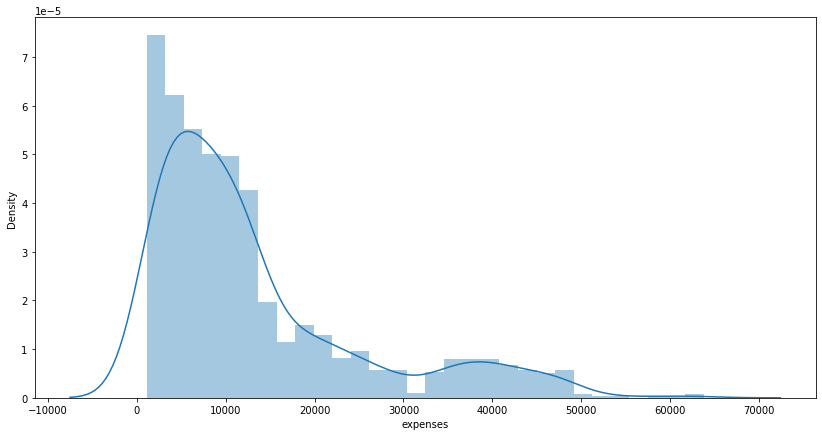

In [42]:
plt.figure(figsize=(14,7))
sns.distplot(data1['expenses'].fillna(100))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



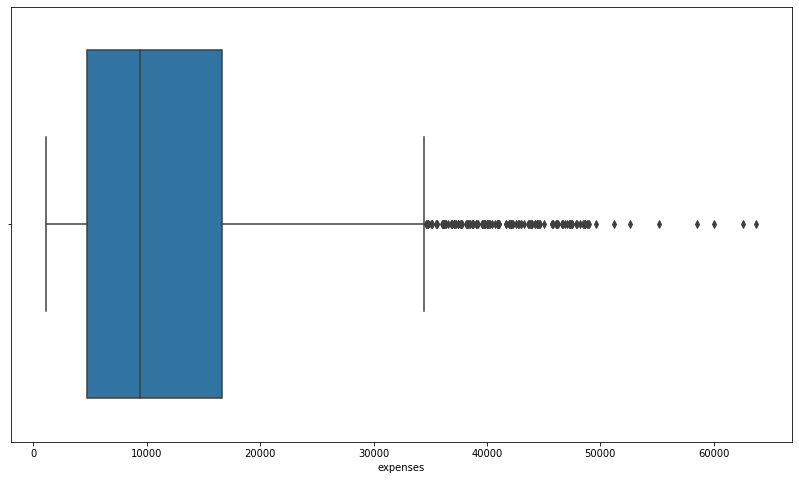

In [43]:
plt.figure(figsize=(14,8))
sns.boxplot(data1['expenses'])

Assumption of  Multiple Linear Regression 
1. Linearity
2. Check for Homoscedasticity
3. Check for Normality of error terms/residuals
4. No autocorrelation of residuals i.e, Corr(ui,uj)=0 for all i ≠ j
5. No perfect Multicollinearity 

1. Linearity Check

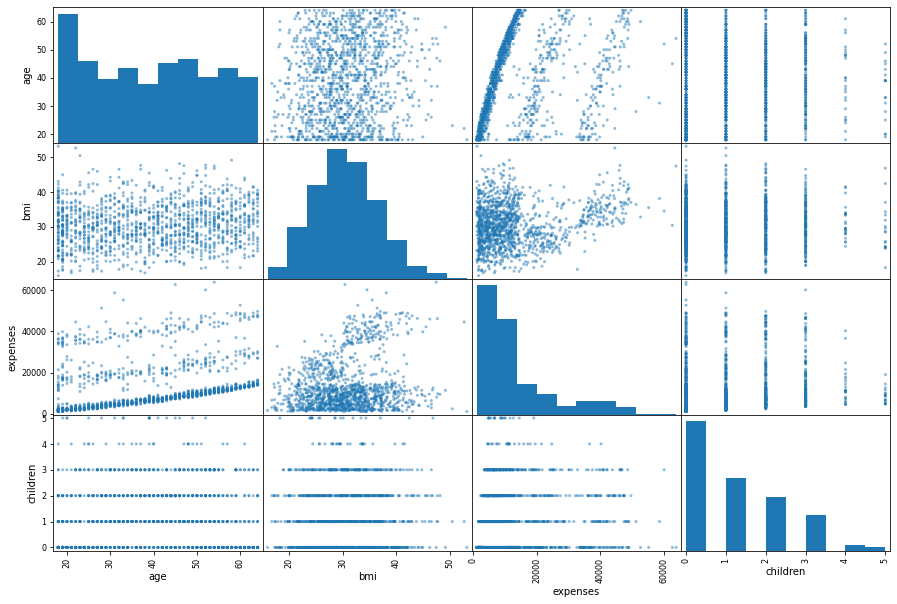

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(data1[["age","bmi","expenses","children"]], figsize=(15,10)) 
plt.show()

From the above Scatter Plot we can see that variables are Linearly related.

<Figure size 1008x648 with 0 Axes>

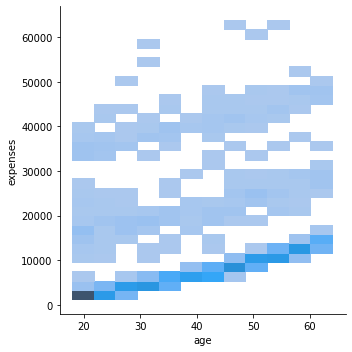

In [45]:
plt.figure(figsize=(14,9))
sns.displot(data1,x='age',y="expenses")

<Figure size 1152x648 with 0 Axes>

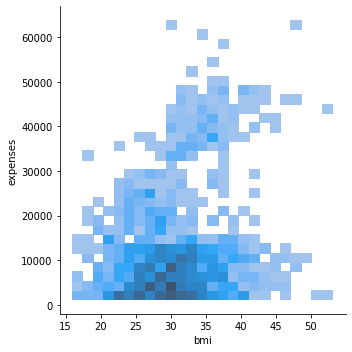

In [46]:
plt.figure(figsize=(16,9))
sns.displot(data1,x='bmi',y="expenses")

<Figure size 1008x576 with 0 Axes>

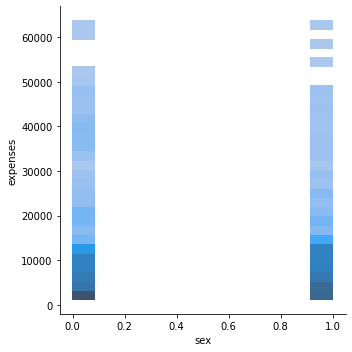

In [47]:
plt.figure(figsize=(14,8))
sns.displot(data1,x='sex',y="expenses")

<Figure size 1152x576 with 0 Axes>

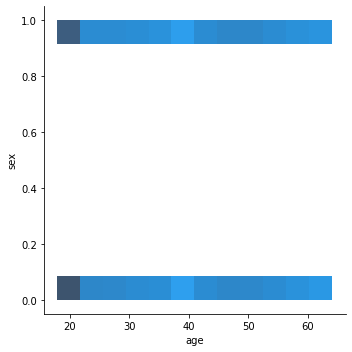

In [48]:
plt.figure(figsize=(16,8))
sns.displot(data1,x='age',y="sex")

<Figure size 1296x720 with 0 Axes>

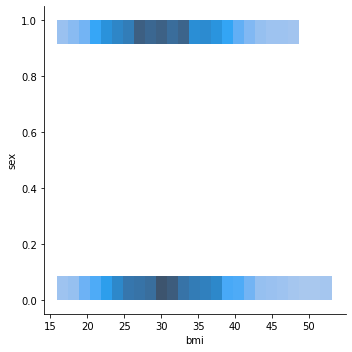

In [49]:
plt.figure(figsize=(18,10))
sns.displot(data1,x='bmi',y="sex")

Model Summary with All Explanatory Variable

In [50]:
X = data1.drop('expenses',axis=1)
X = sm.add_constant(X) 
Y=data1['expenses']
model_mult = sm.OLS(Y, X).fit() 
model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:25:31   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8950.1115    820.710     10.905      0.000    7340.083    1.06e+04
age          256.8392     11.899     21.586      0.000     233.497     280.181
sex          131.3520    332.935      0.395      0.693    -521.784     784.488
bmi          339.2899     28.598     11.864      0.000     283.187     395.393
children     475.6889    137.800      3.452      0.001     205.360     746.017
smoker     -2.385e+04    413.139    -57.723      0.000   -2.47e+04    -2.3e+04
southeast   1788.8551    385.602      4.639      0.000    1032.400    2545.310
southwest   1865.1449    358.803      5.198      0.000    1161.263    2569.027
northwest   2471.6607    342.016      7.227      0.000    1800.710    3142.612
northeast   2824.4508    338.715      8.339      0.000    2159.977    3488.924
==============================================================================
Omnibus:                      300.499   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.382
Skew:                           1.212   Prob(JB):                    6.14e-157
Kurtosis:                       5.652   Cond. No.                     3.24e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

So above summary provides that there is Multicollinearity. And Here we can see that R Square Value is 75% and Adjusted R Square is 75%. So here 75% 

Recursive EliminatioN Method

In [51]:
Y1= data1['expenses']
X1 = data1.drop('expenses', axis=1)

In [52]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
lm.fit(X1, Y1) 
rfe = RFE(lm,n_features_to_select=7,verbose=1)
rfe = rfe.fit(X1,Y1)

Fitting estimator with 9 features.
Fitting estimator with 8 features.


In [53]:
list(zip(X1.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('sex', False, 3),
 ('bmi', True, 1),
 ('children', True, 1),
 ('smoker', True, 1),
 ('southeast', True, 1),
 ('southwest', True, 1),
 ('northwest', False, 2),
 ('northeast', True, 1)]

In [54]:
X_final = X1[X1.columns[rfe.support_]] 
lmbest = sm.OLS(Y1, sm.add_constant(X_final)).fit()

In [55]:
lmbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:25:31   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.149e+04   1026.227     11.196      0.000    9476.724    1.35e+04
age          256.9565     11.891     21.609      0.000     233.629     280.284
bmi          338.7609     28.558     11.862      0.000     282.738     394.784
children     474.7543    137.736      3.447      0.001     204.552     744.957
smoker     -2.384e+04    411.843    -57.875      0.000   -2.46e+04    -2.3e+04
southeast   -682.9252    478.799     -1.426      0.154   -1622.209     256.359
southwest   -606.6224    477.033     -1.272      0.204   -1542.441     329.196
northeast    352.0084    476.106      0.739      0.460    -581.992    1286.008
==============================================================================
Omnibus:                      300.868   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.015
Skew:                           1.213   Prob(JB):                    2.71e-157
Kurtosis:                       5.655   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking Model Summary After Removing Insignificant Variable

In [56]:
from sklearn.model_selection import train_test_split
Y2= data1['expenses']
X2= data1.drop(['expenses','southwest','northeast','southeast','sex','northwest'], axis=1)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.20,random_state=54)
print(X2_train.shape)
print(Y2_train.shape)
print(X2_test.shape)
print(Y2_test.shape)

(1070, 4)
(1070,)
(268, 4)
(268,)


In [57]:
from sklearn.model_selection import train_test_split
Y2= data1['expenses']
X2= data1.drop(['expenses','southwest','northeast','southeast','sex','northwest'], axis=1)
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.20,random_state=54)
model_mult = sm.OLS(Y2_train,sm.add_constant(X2_train)).fit() 
model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     890.3
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:25:31   Log-Likelihood:                -10808.
No. Observations:                1070   AIC:                         2.163e+04
Df Residuals:                    1065   BIC:                         2.165e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.237e+04   1103.915     11.208      0.000    1.02e+04    1.45e+04
age          262.8961     12.775     20.579      0.000     237.830     287.963
bmi          308.8435     30.068     10.272      0.000     249.845     367.842
children     465.8760    150.946      3.086      0.002     169.690     762.062
smoker     -2.426e+04    449.337    -53.997      0.000   -2.51e+04   -2.34e+04
==============================================================================
Omnibus:                      233.263   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              594.729
Skew:                           1.141   Prob(JB):                    7.18e-130
Kurtosis:                       5.852   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here R Square is 77% and Adjusted R Square is 77%. 

Multicollinearity Checking by VIF(Variance Inflation Factor)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X): 
  vif = pd.DataFrame() 
  vif["variables"] = X.columns 
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
  return(vif) 
calc_vif(X2_train)

,variables,VIF
0,age,7.497062
1,bmi,9.417243
2,children,1.786840
3,smoker,4.272275


So, Here is no multicollinearity.

To Check is Residual Plot it Normally Distributed or Not 

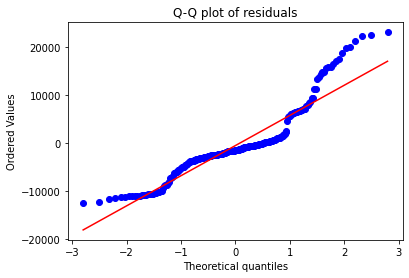

In [59]:
pred_mult = model_mult.predict(sm.add_constant(X2_test))
resid_mult = Y2_test - pred_mult 
stats.probplot(resid_mult, dist = "norm", plot=plt)
plt.title('Q-Q plot of residuals')
plt.show()

By Q-Q plot we can say that Residual is not Perfectly Normally Distributed.

Graphical Representation of Observed Data vs Predicted Data

Check for Normality of Residual 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



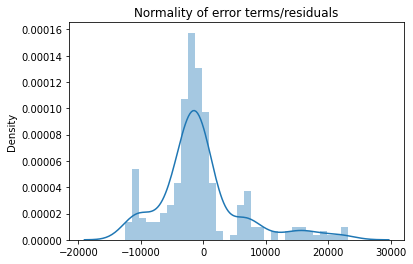

In [60]:
p = sns.distplot(resid_mult,kde=True)
p = plt.title('Normality of error terms/residuals')

From the above diagram we can see that Residual is not Normally Distributed. 

Graphical Representation of Observed Data vs Predicted Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



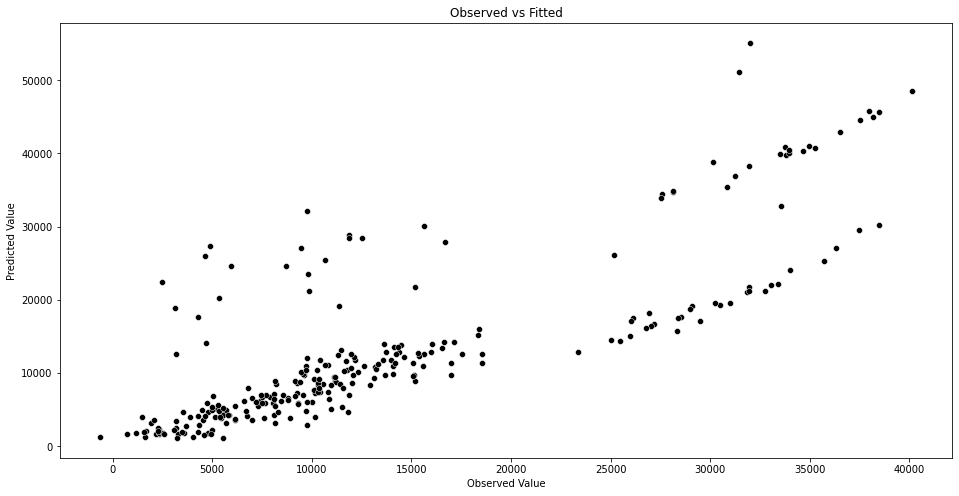

In [61]:
plt.figure(figsize=(16,8))
sns.scatterplot(pred_mult,Y2,color = 'black') 
plt.xlabel('Observed Value') 
plt.ylabel('Predicted Value') 
plt.title('Observed vs Fitted') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



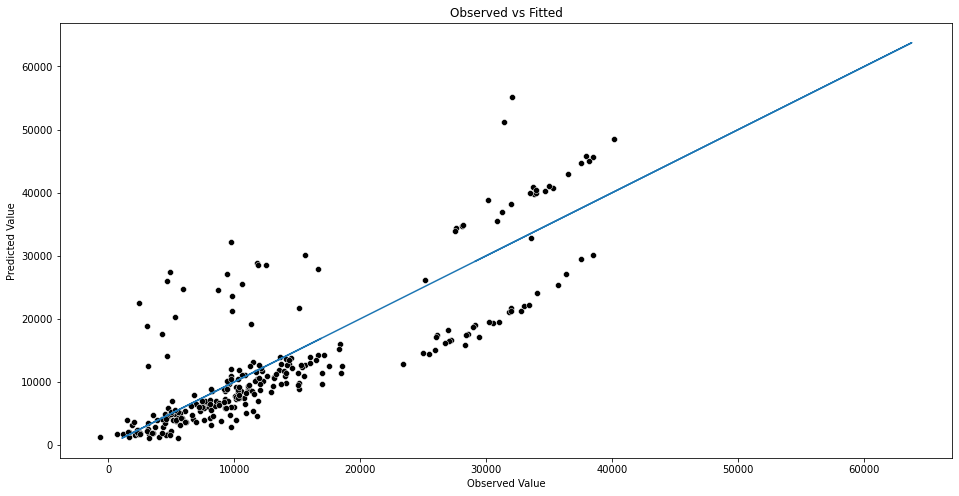

In [62]:
plt.figure(figsize=(16,8))
sns.scatterplot(pred_mult,Y2,color = 'black') 
plt.xlabel('Observed Value') 
plt.ylabel('Predicted Value') 
plt.plot(Y2,Y2) 
plt.title('Observed vs Fitted') 
plt.show()

In [63]:
pd.DataFrame({'Actual':Y2_test , 'Predicted': pred_mult.round(2)})

,Actual,Predicted
246,12648.70,15650.95
793,21195.82,32761.47
1175,2154.36,2263.62
467,12643.38,14203.09
356,8944.12,15159.33
...,...,...
1019,26018.95,4662.00
819,55135.40,32012.66
618,34439.86,27590.89
620,3659.35,6160.70


Checking heteroscedasticity 

Goldfeld Quandt Test

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

In [64]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(resid_mult, X2_test.round(3))
lzip(name, test)

[('F statistic', 1.3083680757693024), ('p-value', 0.06337386609519237)]

Here p - value is greater than level of significance value (alpha =0.05).

so we reject null hypothesis. So Error terms are Homoscedastic.

In [65]:
from scipy import stats
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



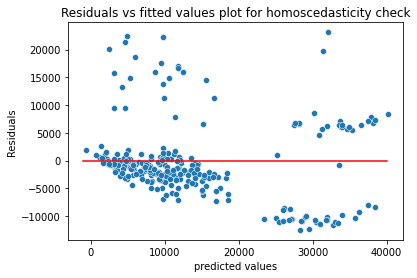

In [66]:
p = sns.scatterplot(pred_mult,resid_mult)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-1000,40000],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Checking for Autocorrelation 

Durbin Watson d-Test

Null Hypothesis: Autocorrelation is not Present

Alternative Hypothesis: Autocorrelation is Present



In [67]:
from statsmodels.stats.stattools import durbin_watson
tests_stats_value= durbin_watson(pred_mult-Y2_test)

In [68]:
print("Durbin Watson Test Statistics Value is : ",tests_stats_value.round(0))

Durbin Watson Test Statistics Value is :  2.0


Now Durbin Watson Test value is 2.0

So there is no Autocorrelation.

AutoCorrelation Graphical Representation

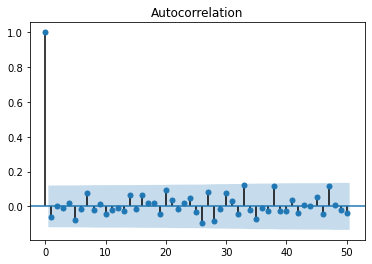

In [69]:
sm.graphics.tsa.plot_acf(resid_mult, lags=50)
plt.show()

Partial Autocorrelation Graphical Representation

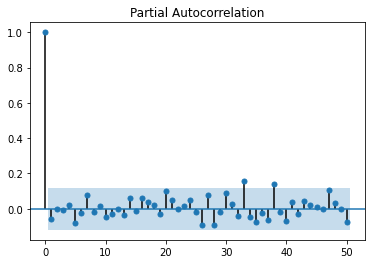

In [70]:
sm.graphics.tsa.plot_pacf(resid_mult, lags=50)
plt.show()